# Text Summarization - Luhn algorithm

- https://courses.ischool.berkeley.edu/i256/f06/papers/luhn58.pdf

# Preparing the environment

In [1]:
import re
import nltk
import string
import heapq

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
original_text = """Artificial intelligence is human like intelligence machines. 
                   It is the study of intelligent artificial agents. 
                   Science and engineering to produce intelligent machines. 
                   Solve problems and have intelligence. 
                   Related to intelligent behavior machines. 
                   Developing of reasoning machines. 
                   Learn from mistakes and successes. 
                   Artificial intelligence is related to reasoning in everyday situations."""
original_text = re.sub(r'\s+', ' ', original_text)
original_text

'Artificial intelligence is human like intelligence machines. It is the study of intelligent artificial agents. Science and engineering to produce intelligent machines. Solve problems and have intelligence. Related to intelligent behavior machines. Developing of reasoning machines. Learn from mistakes and successes. Artificial intelligence is related to reasoning in everyday situations.'

In [5]:
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [6]:
stopwords.append('explanation')

In [7]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
def preprocess(text):
  formatted_text = text.lower()
  tokens = []
  for token in nltk.word_tokenize(formatted_text):
    tokens.append(token)
  tokens = [word for word in tokens if word not in stopwords and word not in string.punctuation]
  formatted_text = ' '.join(element for element in tokens)

  return formatted_text

In [9]:
formatted_text = preprocess(original_text)
formatted_text

'artificial intelligence human like intelligence machines study intelligent artificial agents science engineering produce intelligent machines solve problems intelligence related intelligent behavior machines developing reasoning machines learn mistakes successes artificial intelligence related reasoning everyday situations'

# Function to calculate sentences score

In [10]:
def calculate_sentences_score(sentences, important_words, distance):
  scores = []
  sentence_index = 0

  for sentence in [nltk.word_tokenize(sentence) for sentence in sentences]:
    #print('------------')
    #print(sentence)

    word_index = []
    for word in important_words:
      #print(word)
      try:
        word_index.append(sentence.index(word))
      except ValueError:
        pass

    word_index.sort()
    #print(word_index)

    if len(word_index) == 0:
      continue

    # [0, 1, 5]
    groups_list = []
    group = [word_index[0]]
    i = 1 # 3
    while i < len(word_index): # 3
      # first execution: 1 - 0 = 1
      # second execution: 2 - 1 = 1
      if word_index[i] - word_index[i - 1] < distance:
        group.append(word_index[i])
        #print('group', group)
      else:
        groups_list.append(group[:])
        group = [word_index[i]]
        #print('group', group)
      i += 1
    groups_list.append(group)
    #print('all groups', groups_list)

    max_group_score = 0
    for g in groups_list:
      #print(g)
      important_words_in_group = len(g)
      total_words_in_group = g[-1] - g[0] + 1
      score = 1.0 * important_words_in_group**2 / total_words_in_group
      #print('group score', score)

      if score > max_group_score:
        max_group_score = score

    scores.append((max_group_score, sentence_index))
    sentence_index += 1

  #print('final scores', scores)
  return scores

In [11]:
test = ['a', 'b', 'c']
test.index('a')

0

In [12]:
test = [0,1,3,4,6,9]
test[-1], test[0] + 1

(9, 1)

In [13]:
3*3

9

# Function to summarize the texts

In [14]:
def summarize(text, top_n_words, distance, number_of_sentences, percentage = 0):
  original_sentences = [sentence for sentence in nltk.sent_tokenize(text)]
  #print(original_sentences)
  formatted_sentences = [preprocess(original_sentence) for original_sentence in original_sentences]
  #print(formatted_sentences)
  words = [word for sentence in formatted_sentences for word in nltk.word_tokenize(sentence)]
  #print(words)
  frequency = nltk.FreqDist(words)
  #print(frequency)
  #return frequency
  top_n_words = [word[0] for word in frequency.most_common(top_n_words)]
  #print(top_n_words)
  sentences_score = calculate_sentences_score(formatted_sentences, top_n_words, distance)
  #print(sentences_score)
  if percentage > 0:
    best_sentences = heapq.nlargest(int(len(formatted_sentences) * percentage), sentences_score)
  else:  
    best_sentences = heapq.nlargest(number_of_sentences, sentences_score)
  #print(best_sentences)
  best_sentences = [original_sentences[i] for (score, i) in best_sentences]
  #print(best_sentences)
  return original_sentences, best_sentences, sentences_score

In [15]:
original_sentences, best_sentences, sentences_score = summarize(original_text, 5, 2, 3)

In [16]:
original_sentences

['Artificial intelligence is human like intelligence machines.',
 'It is the study of intelligent artificial agents.',
 'Science and engineering to produce intelligent machines.',
 'Solve problems and have intelligence.',
 'Related to intelligent behavior machines.',
 'Developing of reasoning machines.',
 'Learn from mistakes and successes.',
 'Artificial intelligence is related to reasoning in everyday situations.']

In [17]:
best_sentences

['Learn from mistakes and successes.',
 'Related to intelligent behavior machines.',
 'Science and engineering to produce intelligent machines.']

In [18]:
sentences_score

[(2.0, 0), (2.0, 1), (2.0, 2), (1.0, 3), (2.0, 4), (1.0, 5), (3.0, 6)]

In [19]:
from IPython.core.display import HTML

In [20]:
def visualize(title, sentence_list, best_sentences):
  from IPython.core.display import HTML
  text = ''

  display(HTML(f'<h1>Summary - {title}</h1>'))
  for sentence in sentence_list:
    if sentence in best_sentences:
      text += ' ' + str(sentence).replace(sentence, f"<mark>{sentence}</mark>")
    else:
      text += ' ' + sentence
  display(HTML(f""" {text} """))

# Extracting texts from the Internet

In [21]:
!pip install goose3

     |████████████████████████████████| 86 kB 3.7 MB/s 


In [22]:
from goose3 import Goose

In [23]:
g = Goose()
url = 'https://en.wikipedia.org/wiki/Cristiano_Ronaldo'
article = g.extract(url)

In [24]:
article.cleaned_text

'Cristiano Ronaldo dos Santos Aveiro GOIH ComM (Portuguese pronunciation: [kɾiʃˈtjɐnu ʁɔˈnaɫdu]; born 5 February 1985) is a Portuguese professional footballer who plays as a forward for Premier League club Manchester United and captains the Portugal national team. Often considered the best player in the world and widely regarded as one of the greatest players of all time, Ronaldo has won five Ballon d\'Or awards[note 3] and four European Golden Shoes, the most by a European player. He has won 32 trophies in his career, including seven league titles, five UEFA Champions Leagues, one UEFA European Championship and one UEFA Nations League. Ronaldo holds the records for most appearances (180), most goals (139) and assists (42) in the Champions League, most goals in the European Championship (14), most international goals by a male player (115), and most international appearances by a European male (184). He is one of the few players to have made over 1,100 professional career appearances, 

In [25]:
original_sentences, best_sentences, score_sentences = summarize(article.cleaned_text, 300, 10, 120)

In [26]:
len(original_sentences)

524

In [27]:
(120 / len(original_sentences)) * 100

22.900763358778626

In [28]:
original_sentences

['Cristiano Ronaldo dos Santos Aveiro GOIH ComM (Portuguese pronunciation: [kɾiʃˈtjɐnu ʁɔˈnaɫdu]; born 5 February 1985) is a Portuguese professional footballer who plays as a forward for Premier League club Manchester United and captains the Portugal national team.',
 "Often considered the best player in the world and widely regarded as one of the greatest players of all time, Ronaldo has won five Ballon d'Or awards[note 3] and four European Golden Shoes, the most by a European player.",
 'He has won 32 trophies in his career, including seven league titles, five UEFA Champions Leagues, one UEFA European Championship and one UEFA Nations League.',
 'Ronaldo holds the records for most appearances (180), most goals (139) and assists (42) in the Champions League, most goals in the European Championship (14), most international goals by a male player (115), and most international appearances by a European male (184).',
 'He is one of the few players to have made over 1,100 professional care

In [29]:
best_sentences

["[208] In the Champions League Final, Ronaldo scored two goals in a 4–1 victory over Juventus to take him to 12 goals for the season, making him the competition's top goalscorer for the fifth straight season (sixth overall), as well as the first player to score in three finals in the Champions League era; the second goal was the 600th of his senior career.",
 "[210]\n\n2017–2018: Fifth Ballon d'Or and fifth Champions League title\n\nAt the start of the 2017–18 season, Ronaldo scored Madrid's second goal in the 80th minute of a 3–1 win over Barcelona in the first leg of the 2017 Supercopa de España at Camp Nou; however, he was sent off two minutes later and missed the second leg.",
 "[259][260] On 7 August, Ronaldo scored a brace in a 2–1 home win against Lyon in the second leg of the Champions League round of 16, which saw him finish the season with 37 goals in all competitions; the tally allowed him to break Borel's club record of 36 goals in a single season.",
 '[342]\n\nRonaldo sco

In [30]:
score_sentences

[(8.827586206896552, 0),
 (12.19047619047619, 1),
 (9.38888888888889, 2),
 (6.368421052631579, 3),
 (8.066666666666666, 4),
 (13.136363636363637, 5),
 (15.428571428571429, 6),
 (14.297297297297296, 7),
 (7.2, 8),
 (4.2631578947368425, 9),
 (3.0, 10),
 (10.88888888888889, 11),
 (6.4, 12),
 (9.6, 13),
 (3.0, 14),
 (7.111111111111111, 15),
 (9.6, 16),
 (12.25, 17),
 (2.909090909090909, 18),
 (3.125, 19),
 (2.7777777777777777, 20),
 (2.4, 21),
 (2.0, 22),
 (2.25, 23),
 (1.7857142857142858, 24),
 (2.0, 25),
 (1.5, 26),
 (6.25, 27),
 (2.0, 28),
 (3.272727272727273, 29),
 (3.2666666666666666, 30),
 (1.3333333333333333, 31),
 (2.5714285714285716, 32),
 (2.0, 33),
 (1.0, 34),
 (6.4, 35),
 (6.722222222222222, 36),
 (12.8, 37),
 (2.769230769230769, 38),
 (1.7857142857142858, 39),
 (4.761904761904762, 40),
 (2.0, 41),
 (2.6666666666666665, 42),
 (6.25, 43),
 (4.5, 44),
 (10.321428571428571, 45),
 (4.083333333333333, 46),
 (5.555555555555555, 47),
 (2.7777777777777777, 48),
 (6.666666666666667, 49)

In [31]:
visualize(article.title, original_sentences,  best_sentences)

# Extracting articles from RSS feeds

- AI feeds: https://blog.feedspot.com/ai_rss_feeds/

In [32]:
!pip install feedparser

     |████████████████████████████████| 81 kB 5.1 MB/s 
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6065 sha256=03cec14516cb4a6218e3a83ea8b4f9de40baf69a292604f0ce0f7a4a4e6bfa60
  Stored in directory: /root/.cache/pip/wheels/73/ad/a4/0dff4a6ef231fc0dfa12ffbac2a36cebfdddfe059f50e019aa
Successfully built sgmllib3k


In [33]:
import feedparser

In [34]:
from bs4 import BeautifulSoup
import os
import json

In [35]:
url = 'https://www.aitrends.com/feed/'
feed = feedparser.parse(url)

In [36]:
feed.entries

[{'author': 'Allison Proffitt',
  'author_detail': {'name': 'Allison Proffitt'},
  'authors': [{'name': 'Allison Proffitt'}],
  'content': [{'base': 'https://www.aitrends.com/feed/',
    'language': None,
    'type': 'text/html',
    'value': '<img alt="" class="webfeedsFeaturedVisual wp-post-image" height="70" src="https://www.aitrends.com/wp-content/uploads/2021/10/10-29SoftwareDev-ArmedServices-2-100x70.jpeg" style="float: left; margin-right: 5px;" width="100" /><p><i><span>By John P. Desmond, AI Trends Editor</span></i><span>\xa0</span></p>\n<p><span>The AI stack defined by Carnegie Mellon University is fundamental to the approach being taken by the US Army for its AI development platform efforts, according to Isaac Faber, Chief Data Scientist at the US Army AI Integration Center, speaking at the\xa0</span><a href="https://www.aiworldgov.com/"><span>AI World Government</span></a><span>\xa0event held in-person and virtually from Alexandria, Va., last week.</span><span>\xa0</span><sp

In [37]:
for e in feed.entries:
  print(e.title)
  print(e.content[0].value)
  print('-------')

Best Practices for Building the AI Development Platform in Government
<img alt="" class="webfeedsFeaturedVisual wp-post-image" height="70" src="https://www.aitrends.com/wp-content/uploads/2021/10/10-29SoftwareDev-ArmedServices-2-100x70.jpeg" style="float: left; margin-right: 5px;" width="100" /><p><i><span>By John P. Desmond, AI Trends Editor</span></i><span> </span></p>
<p><span>The AI stack defined by Carnegie Mellon University is fundamental to the approach being taken by the US Army for its AI development platform efforts, according to Isaac Faber, Chief Data Scientist at the US Army AI Integration Center, speaking at the </span><a href="https://www.aiworldgov.com/"><span>AI World Government</span></a><span> event held in-person and virtually from Alexandria, Va., last week.</span><span> </span><span> </span></p>
<figure class="wp-caption alignleft" id="attachment_21162" style="width: 168px;"><img alt="" class="size-full wp-image-21162" height="289" src="https://www.aitrends.com/wp

In [38]:
def clean_html(text):
  if text == '':
    return ''
  else:
    return BeautifulSoup(text, 'html5lib').get_text()

In [39]:
e.content[0].value

'<img alt="" class="webfeedsFeaturedVisual wp-post-image" height="70" src="https://www.aitrends.com/wp-content/uploads/2021/10/10-22ForbiddenKnowledge-2-100x70.jpeg" style="float: left; margin-right: 5px;" width="100" /><p><i><span>By Lance Eliot, the AI Trends Insider</span></i><span>\xa0</span><span>\xa0\xa0</span><span>\xa0</span></p>\n<p><span>Are there things that we must not know?\xa0</span><span>\xa0</span><span>\xa0</span></p>\n<p><span>This is an age-old question.\xa0Some assert that there is the potential for knowledge that ought to not be known. In other words, there are ideas, concepts, or mental formulations that should we become aware of that knowledge it could be our downfall. The discovery or invention of some new innovation or way of thinking could be unduly dangerous. It would be best to not go there, as it were, and avoid ever landing on such knowledge: forbidden knowledge.</span><span>\xa0</span><span>\xa0</span><span>\xa0</span></p>\n<p><span>The typical basis for 

In [40]:
clean_html(e.content[0].value)

'By Lance Eliot, the AI Trends Insider\xa0\xa0\xa0\xa0\nAre there things that we must not know?\xa0\xa0\xa0\nThis is an age-old question.\xa0Some assert that there is the potential for knowledge that ought to not be known. In other words, there are ideas, concepts, or mental formulations that should we become aware of that knowledge it could be our downfall. The discovery or invention of some new innovation or way of thinking could be unduly dangerous. It would be best to not go there, as it were, and avoid ever landing on such knowledge: forbidden knowledge.\xa0\xa0\xa0\nThe typical basis for wanting to forbid the discovery or emergence of forbidden knowledge is that the adverse consequences are overwhelming.\xa0The end result is so devastating and undercutting that the bad side outweighs the good that could be derived from the knowledge.\xa0\xa0\xa0\nIt is conceivable that there might be knowledge that is so bad that it has no good possibilities at all. Thus, rather than trying to ba

In [41]:
articles = []
for e in feed.entries:
  articles.append({'title': e.title, 'content': clean_html(e.content[0].value)})

In [ ]:
articles

[{'content': 'By John P. Desmond, AI Trends Editor\xa0\nPredictive maintenance (PdM)\xa0has emerged as a killer AI app.\xa0\nIn the past five years, predictive maintenance has moved from a niche use case to a fast-growing, high return on investment (ROI) application that is delivering true value to users.\xa0These developments are an indication of the power of the Internet of Things (IoT) and AI together, a market considered in its infancy today.\xa0\nThese observations are from research conducted by IoT Analytics, consultants who supply market intelligence, which recently estimated that the $6.9 billion predictive maintenance market will reach $28.2 billion by 2026.\xa0\xa0\nThe company began its research coverage of the IoT-driven predictive maintenance market in 2016, at an industry maintenance conference in Dortmund, Germany. Not much was happening. “We were bitterly disappointed,” stated Knud Lasse Lueth, CEO at IoT Analytics, in an account in\xa0IoT Business News. “Not a single e

In [42]:
save_file = os.path.join('feed.json')
feed = open(save_file, 'w+')
feed.write(json.dumps(articles, indent=1))
feed.close()

In [43]:
blog_articles = json.loads(open('feed.json').read())
blog_articles

[{'content': 'By John P. Desmond, AI Trends Editor\xa0\nThe AI stack defined by Carnegie Mellon University is fundamental to the approach being taken by the US Army for its AI development platform efforts, according to Isaac Faber, Chief Data Scientist at the US Army AI Integration Center, speaking at the\xa0AI World Government\xa0event held in-person and virtually from Alexandria, Va., last week.\xa0\xa0\nIsaac Faber, Chief Data Scientist, US Army AI Integration Center\n“If we want to move the Army from legacy systems through digital modernization, one of the biggest issues I have found is the difficulty in abstracting away the differences in applications,” he said. “The most important part of digital transformation is the middle layer, the platform that makes it easier to be on the cloud or on a local computer.” The desire is to be able to move your software platform to another platform, with the same ease\xa0with\xa0which a new smartphone carries over the user’s contacts and histori

# Word cloud

In [44]:
feed_content = ''
for article in blog_articles:
  feed_content += article['content']

In [45]:
feed_content

'By John P. Desmond, AI Trends Editor\xa0\nThe AI stack defined by Carnegie Mellon University is fundamental to the approach being taken by the US Army for its AI development platform efforts, according to Isaac Faber, Chief Data Scientist at the US Army AI Integration Center, speaking at the\xa0AI World Government\xa0event held in-person and virtually from Alexandria, Va., last week.\xa0\xa0\nIsaac Faber, Chief Data Scientist, US Army AI Integration Center\n“If we want to move the Army from legacy systems through digital modernization, one of the biggest issues I have found is the difficulty in abstracting away the differences in applications,” he said. “The most important part of digital transformation is the middle layer, the platform that makes it easier to be on the cloud or on a local computer.” The desire is to be able to move your software platform to another platform, with the same ease\xa0with\xa0which a new smartphone carries over the user’s contacts and histories.\xa0\xa0\n

In [46]:
formatted_feed_content = preprocess(feed_content)
formatted_feed_content

'john p. desmond ai trends editor ai stack defined carnegie mellon university fundamental approach taken us army ai development platform efforts according isaac faber chief data scientist us army ai integration center speaking ai world government event held in-person virtually alexandria va. last week isaac faber chief data scientist us army ai integration center “ want move army legacy systems digital modernization one biggest issues found difficulty abstracting away differences applications ” said “ important part digital transformation middle layer platform makes easier cloud local computer. ” desire able move software platform another platform ease new smartphone carries user ’ contacts histories ethics cuts across layers ai application stack positions planning stage top followed decision support modeling machine learning massive data management device layer platform bottom “ advocating think stack core infrastructure way applications deployed siloed approach ” said “ need create d

In [47]:
len(feed_content), len(formatted_feed_content)

(102389, 71569)

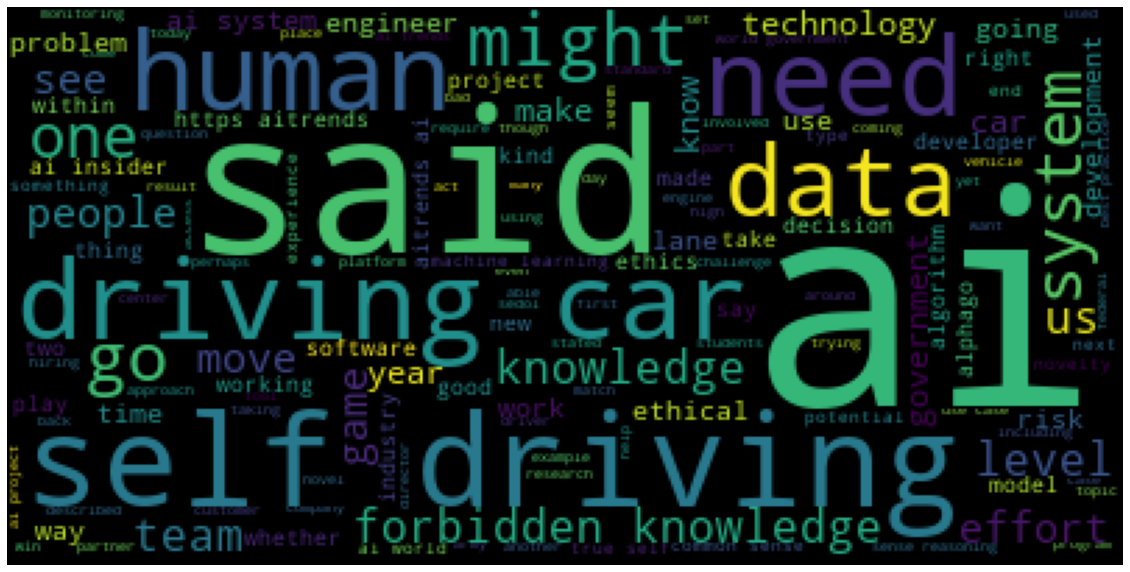

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(WordCloud().generate(formatted_feed_content));

# Extracting named entities

- Acronyms: https://spacy.io/api/annotation#named-entities

In [49]:
import spacy

In [50]:
nlp = spacy.load('en')
nlp

In [51]:
document = nlp(formatted_feed_content)

In [52]:
from spacy import displacy
displacy.render(document, style = 'ent', jupyter = True)

In [53]:
for entity in document.ents:
  if entity.label_ == 'GPE':
    print(entity.text, entity.label_)

savoie GPE
us GPE
alexandria va GPE
us GPE
us GPE
hirevue GPE
utah GPE
hirevue GPE
hirevue GPE
hamburg GPE
germany GPE
hamburg GPE
germany GPE
louisiana GPE
alumina GPE
noranda alumina GPE
alumina GPE
us GPE
us GPE
alexandria GPE
ieee GPE
alexandria GPE
california GPE
calif GPE
us GPE
us GPE
san francisco GPE
lab cisco GPE
san francisco GPE
cisco GPE
cisco GPE
san francisco GPE
forbidden GPE
us GPE
us GPE


# Summarizing the articles

In [56]:
for article in blog_articles:
  #print(article)
  original_sentences, best_sentences, _ = summarize(article['content'], 150, 10, number_of_sentences=5, percentage=0.5)
  visualize(article['title'], original_sentences, best_sentences)
  save_summary(article['title'], original_sentences, best_sentences)

# Saving the summary

In [55]:
def save_summary(title, original_sentences, best_sentences):
  HTML_TEMPLATE = """<html>
    <head>
      <title>{0}</title>
      <meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
    </head>
    <body>{1}</body>

  </html>"""
  text = ''
  for sentence in original_sentences:
    if sentence in best_sentences:
      text += str(sentence).replace(sentence, f"<mark>{sentence}</mark>")
    else:
      text += sentence
  
  save_file = open(os.path.join(title + '.html'), 'wb')
  html_file = HTML_TEMPLATE.format(title, text)
  save_file.write(html_file.encode('utf-8'))
  save_file.close()